In [10]:
import os
from dotenv import load_dotenv
import psycopg2
from psycopg2.extras import DictCursor
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [11]:
# Function that connects to database
load_dotenv()
def db_connect():
    db_name = os.environ['db_name']
    db_user = os.environ['db_user']
    db_host = os.environ['db_host']
    db_credentials = os.environ['db_creds']
  
    conn_string = "dbname='" + str(db_name) + "' user='" + str(db_user) + "' host='" + str(db_host) + "' password='" + str(db_credentials) + "'"

    try:
        conn = psycopg2.connect(str(conn_string))
        conn.autocommit = True
    except:
        print("Unable to connect to the database")

    cur = conn.cursor(cursor_factory=DictCursor)
    return cur

cur = db_connect()

In [25]:
def bar_plot(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot(x=codes, y=count)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.show()

In [13]:
query = "SELECT (extract(year from date))::int as year, AVG(tmin), AVG(tmax), AVG(tavg), AVG(prcp), AVG(snow), AVG(snwd) FROM weather.weather_clean WHERE extract(year from date) < 2021 GROUP BY year ORDER BY year"
cur.execute(query)
results = cur.fetchall()

weather_df = pd.DataFrame(results, columns=['year','tmin','tmax','tavg','prcp','snow','snwd'])
weather_df

,year,tmin,tmax,tavg,prcp,snow,snwd
0,1990,46.751136,63.276276,55.013706,0.120957,0.080108,4.917624
1,1991,46.165117,62.568618,54.366868,0.116913,0.069574,5.092871
2,1992,46.240191,62.899981,54.570086,0.117116,0.069587,4.900861
3,1993,47.222572,63.669614,55.446093,0.117592,0.056154,4.489111
4,1994,48.316513,65.238231,56.777372,0.124054,0.068569,3.356423
5,1995,47.383787,64.239496,55.811641,0.123440,0.063278,2.892808
6,1996,47.804272,64.658503,56.231388,0.133255,0.075748,3.470398
7,1997,47.853521,64.507270,56.180395,0.117464,0.073669,3.584055
8,1998,48.414172,64.894335,56.654253,0.116503,0.059583,3.388906
9,1999,47.872045,64.471927,56.171986,0.132776,0.087518,3.451413


In [15]:
# Load disaster data to DataFrame
query = "SELECT year, COUNT(*), (SUM(deaths))::int, (SUM(damages))::int FROM weather.disasters_clean WHERE year >= 1990 and year < 2021 GROUP BY year ORDER BY year"
cur.execute(query)
results = cur.fetchall()

disaster_df = pd.DataFrame(results, columns=['year','count','deaths','damages'])
disaster_df

,year,count,deaths,damages
0,1990,303,53133,49779822
1,1991,266,189707,37593461
2,1992,234,18913,55098163
3,1993,267,21821,50992889
4,1994,255,15590,71033574
5,1995,278,637166,155071039
6,1996,273,31595,43327243
7,1997,323,30024,40261946
8,1998,365,62673,84132740
9,1999,416,76906,112248954


In [18]:
query = "SELECT year, country_code, region, disaster_type, deaths, damages FROM weather.disasters_clean WHERE year >= 1990 and year < 2021 ORDER BY year"
cur.execute(query)
results = cur.fetchall()
disaster_df_full = pd.DataFrame(results, columns=['year','country_code','region','disaster_type','deaths','damages'])
disaster_df_full

,year,country_code,region,disaster_type,deaths,damages
0,1990,IN,Southern Asia,Extreme temperature,178.0,NaN
1,1990,LK,Southern Asia,Flood,33.0,NaN
2,1990,LK,Southern Asia,Flood,NaN,NaN
3,1990,LU,Western Europe,Storm,NaN,90000.0
4,1990,MS,Caribbean,Storm,NaN,NaN
...,...,...,...,...,...,...
11618,2020,SN,Western Africa,Flood,7.0,18000.0
11619,2020,PH,South-Eastern Asia,Storm,5.0,31100.0
11620,2020,TW,Eastern Asia,Storm,1.0,NaN
11621,2020,SO,Eastern Africa,Flood,6.0,NaN


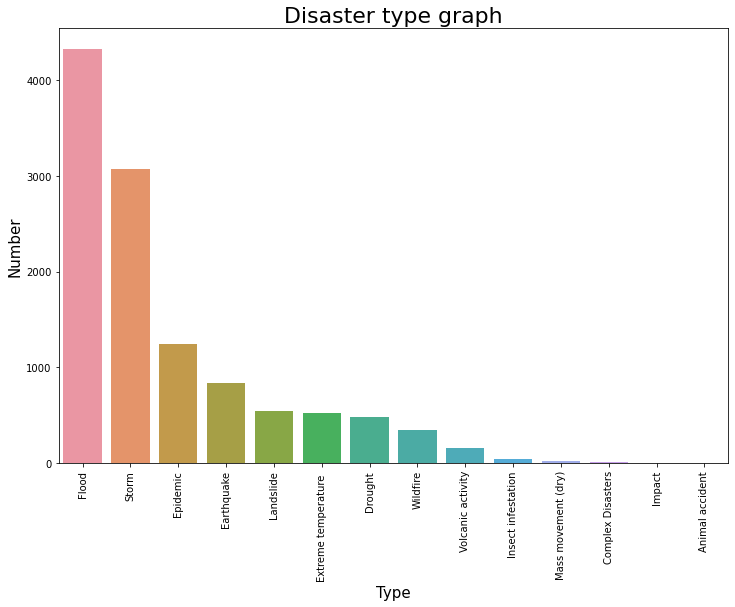

In [26]:
bar_plot(disaster_df_full['disaster_type'], 'Type', 'Number', 'Disaster type graph', rotate=90)

In [151]:
disaster_df_full[['year','region','damages']].groupby(['year','region']).sum().sort_values(['year','damages'], ascending=False).head(21)

damages
year region                               
2020 Northern America           79100000.0
     Southern Asia              32388000.0
     Eastern Asia               30713700.0
     Southern Europe             8503000.0
     Central America             6946000.0
     Australia and New Zealand   4010000.0
     South America               3820000.0
     South-Eastern Asia          2781566.0
     Western Asia                1523000.0
     Caribbean                   1174800.0
     Western Europe              1053000.0
     Eastern Europe               400861.0
     Northern Africa              326000.0
     Northern Europe              130000.0
     Western Africa               128000.0
     Polynesia                    111000.0
     Melanesia                     14120.0
     Eastern Africa                10000.0
     Central Asia                      0.0
     Middle Africa                     0.0
     Southern Africa                   0.0

In [152]:
disaster_df_full[['year','region','deaths']].groupby(['year','region']).sum().sort_values(['year','deaths'], ascending=False).head(21)

deaths
year region                           
2020 Southern Asia              4067.0
     Western Europe             3812.0
     Northern Europe            2569.0
     South-Eastern Asia          983.0
     Eastern Asia                661.0
     Eastern Africa              634.0
     Central America             570.0
     Western Africa              472.0
     Western Asia                325.0
     South America               310.0
     Northern America            254.0
     Northern Africa             201.0
     Middle Africa               194.0
     Melanesia                    83.0
     Caribbean                    56.0
     Southern Europe              56.0
     Eastern Europe               27.0
     Southern Africa              13.0
     Central Asia                  6.0
     Australia and New Zealand     1.0
     Polynesia                     0.0

In [129]:
disaster_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11623 entries, 0 to 11622
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           11623 non-null  int64  
 1   country_code   11623 non-null  object 
 2   region         11623 non-null  object 
 3   disaster_type  11623 non-null  object 
 4   deaths         8246 non-null   float64
 5   damages        3905 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 545.0+ KB


In [87]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    31 non-null     int64  
 1   tmin    31 non-null     float64
 2   tmax    31 non-null     float64
 3   tavg    31 non-null     float64
 4   prcp    31 non-null     float64
 5   snow    31 non-null     float64
 6   snwd    31 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.8 KB


In [88]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year     31 non-null     int64
 1   count    31 non-null     int64
 2   deaths   31 non-null     int64
 3   damages  31 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [89]:
# disaster_df = disaster_df[(disaster_df.year >= 1990) & (disaster_df.year < 2021)]

<AxesSubplot:>

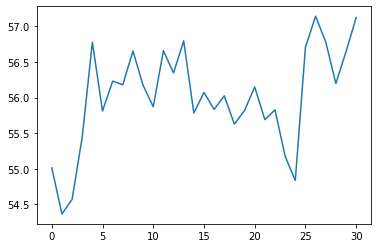

In [117]:
weather_df.tavg.plot()

<AxesSubplot:>

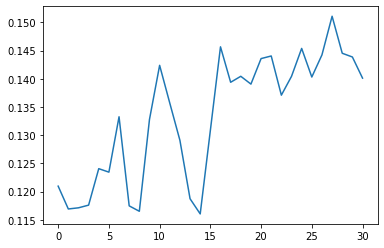

In [115]:
weather_df.prcp.plot()

<AxesSubplot:>

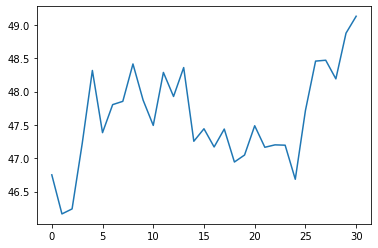

In [118]:
weather_df.tmin.plot()

<AxesSubplot:>

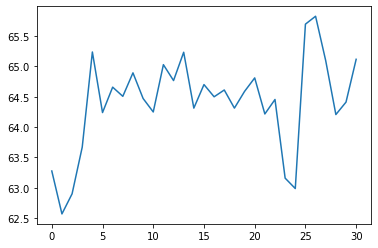

In [119]:
weather_df.tmax.plot()

<AxesSubplot:>

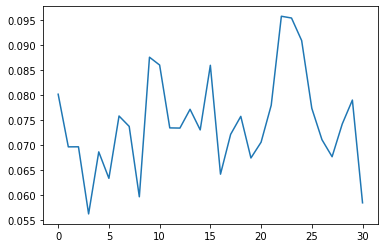

In [121]:
weather_df.snow.plot()

<AxesSubplot:>

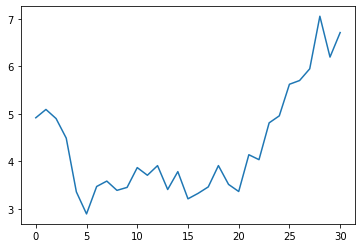

In [122]:
weather_df.snwd.plot()

In [92]:
disaster_df.deaths.mean()

80520.3870967742

In [93]:
disaster_df.damages.mean()

110614877.74193548

In [94]:
# disaster_df_year = disaster_df.year.value_counts(sort=False)
# disaster_df_year

<AxesSubplot:>

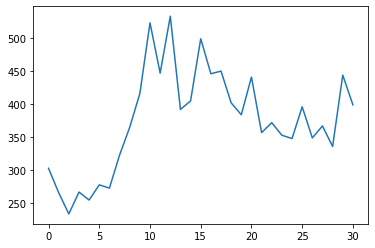

In [110]:
disaster_df['count'].plot()

<AxesSubplot:>

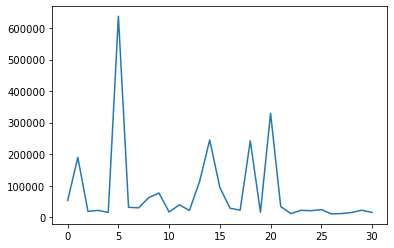

In [98]:
disaster_df.deaths.plot()

<AxesSubplot:>

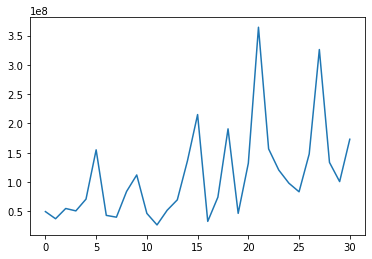

In [99]:
disaster_df.damages.plot()

In [111]:
combined = pd.merge(weather_df, disaster_df, on='year')
combined

,year,tmin,tmax,tavg,prcp,snow,snwd,count,deaths,damages
0,1990,46.751136,63.276276,55.013706,0.120957,0.080108,4.917624,303,53133,49779822
1,1991,46.165117,62.568618,54.366868,0.116913,0.069574,5.092871,266,189707,37593461
2,1992,46.240191,62.899981,54.570086,0.117116,0.069587,4.900861,234,18913,55098163
3,1993,47.222572,63.669614,55.446093,0.117592,0.056154,4.489111,267,21821,50992889
4,1994,48.316513,65.238231,56.777372,0.124054,0.068569,3.356423,255,15590,71033574
5,1995,47.383787,64.239496,55.811641,0.123440,0.063278,2.892808,278,637166,155071039
6,1996,47.804272,64.658503,56.231388,0.133255,0.075748,3.470398,273,31595,43327243
7,1997,47.853521,64.507270,56.180395,0.117464,0.073669,3.584055,323,30024,40261946
8,1998,48.414172,64.894335,56.654253,0.116503,0.059583,3.388906,365,62673,84132740
9,1999,47.872045,64.471927,56.171986,0.132776,0.087518,3.451413,416,76906,112248954


In [112]:
# combined[['avg','count']].plot()

In [113]:
combined.corr()

,year,tmin,tmax,tavg,prcp,snow,snwd,count,deaths,damages
year,1.000000,0.411001,0.359349,0.409465,0.801632,0.207489,0.555087,0.395345,-0.232393,0.507910
tmin,0.411001,1.000000,0.759631,0.932624,0.227014,-0.228293,0.255031,0.277451,-0.207237,0.142533
tmax,0.359349,0.759631,1.000000,0.943130,0.266906,-0.231063,-0.086782,0.388758,-0.084760,0.171654
tavg,0.409465,0.932624,0.943130,1.000000,0.264129,-0.244896,0.082206,0.357520,-0.152957,0.168097
prcp,0.801632,0.227014,0.266906,0.264129,1.000000,0.273229,0.356368,0.430459,-0.246406,0.419149
snow,0.207489,-0.228293,-0.231063,-0.244896,0.273229,1.000000,-0.026721,0.257441,-0.198115,0.101983
snwd,0.555087,0.255031,-0.086782,0.082206,0.356368,-0.026721,1.000000,-0.153971,-0.360437,0.217768
count,0.395345,0.277451,0.388758,0.357520,0.430459,0.257441,-0.153971,1.000000,-0.110166,0.069684
deaths,-0.232393,-0.207237,-0.084760,-0.152957,-0.246406,-0.198115,-0.360437,-0.110166,1.000000,0.137322
damages,0.507910,0.142533,0.171654,0.168097,0.419149,0.101983,0.217768,0.069684,0.137322,1.000000
